# Kaggle Home Prices

Predict home sale price.  This is essentially clean room, no use of discussions.

# Explore the Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

dftr = pd.read_csv('./train.csv')
dfts = pd.read_csv('./test.csv')


In [2]:
dftr.shape

(1460, 81)

In [3]:
dftr.describe(include=[np.number]).iloc[:,:20]

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000


In [4]:
dftr.describe(include=[np.number]).iloc[:,20:]

,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
dftr.describe(include=[np.object]).iloc[:,:14]

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,8,5,8,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,1445,1220,726,1141


In [6]:
dftr.describe(include=[np.object]).iloc[:,14:30]

,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical
count,1460,1460,1460,1452,1460,1460,1460,1423,1423,1422,1423,1422,1460,1460,1460,1459
unique,8,15,16,4,4,5,6,4,4,4,6,6,6,5,2,5
top,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr
freq,1434,515,504,864,906,1282,647,649,1311,953,430,1256,1428,741,1365,1334


In [7]:
dftr.describe(include=[np.object]).iloc[:,30:]

,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,770,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,4,7,5,6,3,5,5,3,3,4,4,9,6
top,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,735,1360,380,870,605,1311,1326,1340,3,157,49,1267,1198


Initial thoughts:
* Several of the categorical features are so unbalanced they are unlikely to provide any value, eg RoofMatl.
* Several features are refinements of others, like GarageArea and GarageCars.
* Instead of filtering out redundant features, let's start from a minimal set and add.

Let's start by looking at year and month.  Do we want to model inflation over time or seasonality?  This is 2006-2010, so one would expect a dip in 2009.

There are some interesting considerations here:
* In a dip, more afluent homeowners may hold off on selling.  This makes it difficult to recognize a trend without normalizing by several factors.

Generally we're going to look at per-square-foot price as a basic normalization.

# Feature Evaluation

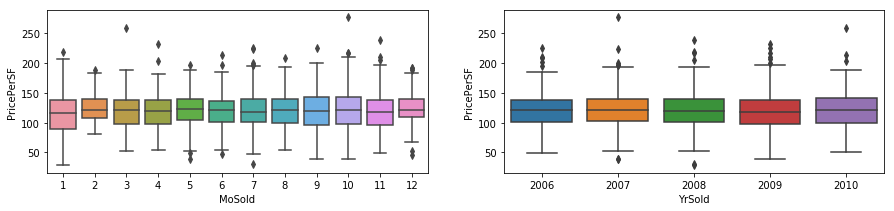

In [8]:
dftr0 = dftr.copy()
dftr0 = dftr0.assign(PricePerSF=(dftr['SalePrice'] / dftr['GrLivArea']))
dftr0 = dftr0.assign(EpochMonth=(dftr['YrSold'] - 2006) * 12 + dftr['MoSold'])
for col in ['YrSold', 'MoSold', 'EpochMonth']:
    dftr0[col] = dftr0[col].astype('category')

plt.figure(1, figsize=(15,3))
plt.subplot(1, 2, 1)
sns.boxplot(x="MoSold", y="PricePerSF", data=dftr0);
plt.subplot(1, 2, 2)
sns.boxplot(x="YrSold", y="PricePerSF", data=dftr0);

Not terribly compelling, but it might be simpson's paradox.  Let's take a look at some other candidates

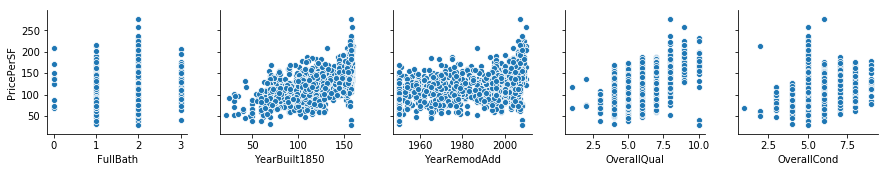

In [9]:
#corr = dftr0.corr()[['FullBath', 'YearBuilt', 'OverallQual', 'OverallCond', 'PricePerSF']]
dftr0['YearBuilt1850'] = dftr0['YearBuilt'] - 1850

sns.pairplot(dftr0, x_vars=['FullBath', 'YearBuilt1850', 'YearRemodAdd', 'OverallQual', 'OverallCond'], y_vars='PricePerSF')

Full baths are perhaps correlated with square footage.

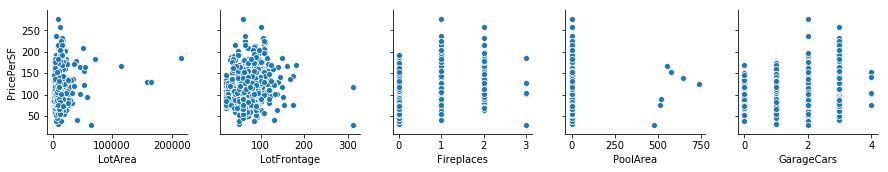

In [10]:
dftr0['LotArea'].map(lambda x: min(x, 25000))
dftr0['LotFrontage'].map(lambda x: min(x, 150))

sns.pairplot(dftr0, x_vars=['LotArea', 'LotFrontage', 'Fireplaces', 'PoolArea', 'GarageCars'], y_vars='PricePerSF')

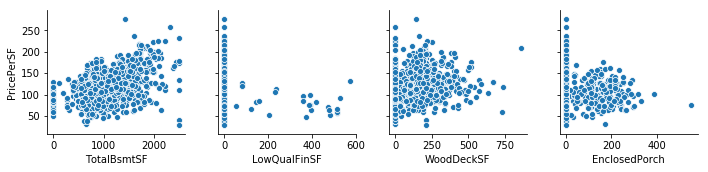

In [11]:
dftr0.loc[:,'TotalBsmtSF'] = dftr0['TotalBsmtSF'].apply(lambda x: min(x, 2500))
sns.pairplot(dftr0, x_vars=['TotalBsmtSF', 'LowQualFinSF', 'WoodDeckSF', 'EnclosedPorch'], y_vars='PricePerSF')

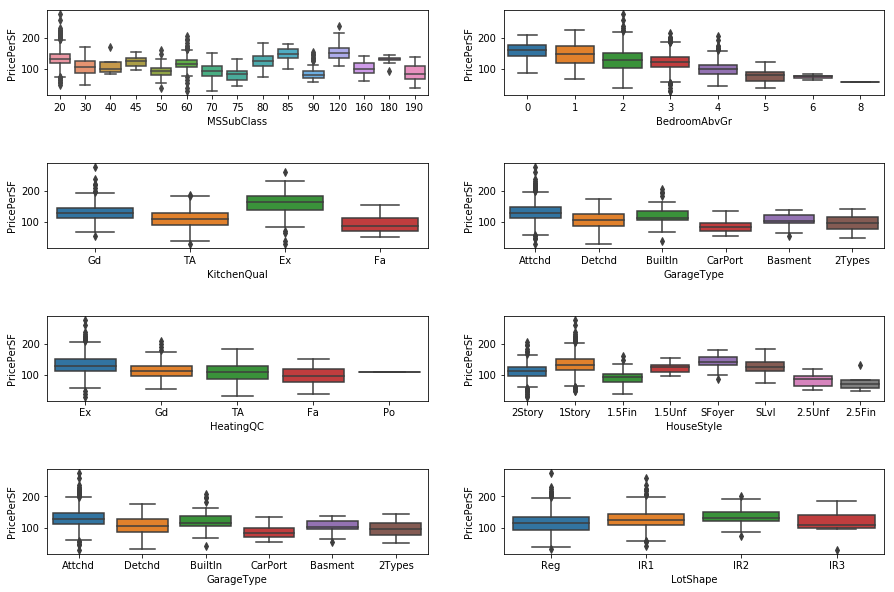

In [28]:
plt.figure(1, figsize=(15,10))
for col in ['MSSubClass']:
    dftr0[col] = dftr0[col].astype('category')
    
prows = 4
plt.subplots_adjust(hspace=0.8)
plt.subplot(prows, 2, 1)
sns.boxplot(data=dftr0, x='MSSubClass', y='PricePerSF')
plt.subplot(prows, 2, 2)
sns.boxplot(data=dftr0, x='BedroomAbvGr', y='PricePerSF')
plt.subplot(prows, 2, 3)
sns.boxplot(data=dftr0, x='KitchenQual', y='PricePerSF')
plt.subplot(prows, 2, 4)
sns.boxplot(data=dftr0, x='GarageType', y='PricePerSF')
plt.subplot(prows, 2, 5)
sns.boxplot(data=dftr0, x='HeatingQC', y='PricePerSF')
plt.subplot(prows, 2, 6)
sns.boxplot(data=dftr0, x='HouseStyle', y='PricePerSF')
plt.subplot(prows, 2, 7)
sns.boxplot(data=dftr0, x='GarageType', y='PricePerSF')
plt.subplot(prows, 2, 8)
sns.boxplot(data=dftr0, x='LotShape', y='PricePerSF')
                                   

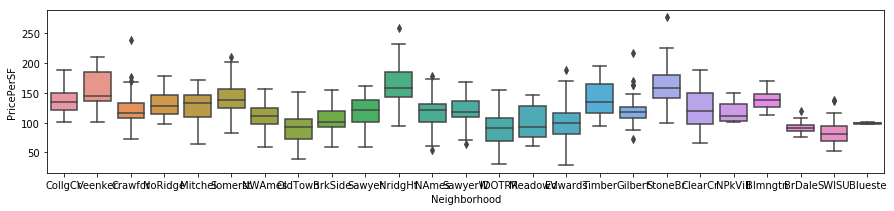

In [13]:

plt.figure(1, figsize=(15,3))
sns.boxplot(data=dftr0, x='Neighborhood', y='PricePerSF')


In [55]:
from sklearn import preprocessing

selected = ['BedroomAbvGr', 'GrLivArea', 'OverallQual', 'OverallCond',
              'MSSubClass', 'Neighborhood', 'TotalBsmtSF', 
              'KitchenQual', 'HouseStyle', 'GarageType',
              'HeatingQC', 'LotShape',
              'SaleType', 'SaleCondition'
           ]

dftr1 = dftr[selected].copy()
dfts1 = dfts[selected].copy()

dftr1['YearBuilt1850'] = dftr['YearBuilt'].map(lambda x: x - 1850)
dfts1['YearBuilt1850'] = dfts['YearBuilt'].map(lambda x: x - 1850)

for col in ['MSSubClass']:
    dftr1[col] = dftr1[col].astype('category')
    dfts1[col] = dfts1[col].astype('category')

categorical = list(dftr1.select_dtypes(include=['category', 'object']))
for feature in categorical:
    combined = pd.Series.append(dftr1[feature], dfts1[feature]).astype(str)
    le = preprocessing.LabelEncoder()
    le = le.fit(combined)
    dftr1[feature] = le.transform(dftr1[feature].astype(str))
    dfts1[feature] = le.transform(dfts1[feature].astype(str))
    
# one-hot encoding
#dftr1 = pd.get_dummies(dftr1)

dfts1 = dfts1.fillna(0)
dfts1.describe(include='all')

,BedroomAbvGr,GrLivArea,OverallQual,OverallCond,MSSubClass,Neighborhood,TotalBsmtSF,KitchenQual,HouseStyle,GarageType,HeatingQC,LotShape,SaleType,SaleCondition,YearBuilt1850
count,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2.854010,1486.045922,6.078821,5.553804,7.113777,12.623029,1045.400960,2.355038,3.015079,2.481837,1.529130,1.952707,7.470185,3.787526,121.357779
std,0.829788,485.566099,1.436812,1.113740,3.743775,5.897889,443.592976,0.839725,1.915153,1.933083,1.746152,1.410751,1.634558,1.055436,30.390071
min,0.000000,407.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,29.000000
25%,2.000000,1117.500000,5.000000,5.000000,5.000000,8.000000,784.000000,2.000000,2.000000,1.000000,0.000000,0.000000,8.000000,4.000000,103.000000
50%,3.000000,1432.000000,6.000000,5.000000,5.000000,12.000000,988.000000,3.000000,2.000000,1.000000,0.000000,3.000000,8.000000,4.000000,123.000000
75%,3.000000,1721.000000,7.000000,6.000000,10.000000,17.000000,1304.000000,3.000000,5.000000,5.000000,4.000000,3.000000,8.000000,4.000000,151.000000
max,6.000000,5095.000000,10.000000,9.000000,15.000000,24.000000,5095.000000,4.000000,7.000000,6.000000,4.000000,3.000000,9.000000,5.000000,160.000000


# Model and Evaluation

An ensemble of trees is attrative since we know a single additive model isn't going to be sufficient.  Most house characteristics are likely multipliers.

Unfortunately 1460 is not a lot of examples for cross-validation.

In [56]:
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.model_selection import GridSearchCV

# Choose the type of classifier. 

y_log = dftr['SalePrice'].apply(np.log)

if True:
    # Run the grid search
    clf = GradientBoostingRegressor()
    # Choose some parameter combinations to try
    parameters = {'n_estimators': [80, 100, 120], 
                  'learning_rate' : [0.05, 0.1, 0.2],
                  'max_features': ['sqrt'], 
                  'max_depth': [3, 4, 6, 8], 
                  'min_samples_split': [18, 20, 22],
                  'min_samples_leaf': [3, 4, 5, 6]
                 }

    # Type of scoring used to compare parameter combinations
    mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)
    
    grid_obj = GridSearchCV(clf, parameters, scoring=mse_scorer, cv=5)
    grid_obj = grid_obj.fit(dftr1, y_log)

    # Set the clf to the best combination of parameters
    clf = grid_obj.best_estimator_
    print(grid_obj.best_params_)
    print(grid_obj.best_score_)
else:
    clf = GradientBoostingRegressor(n_estimators=40, max_depth=5, min_samples_split=10, min_samples_leaf=5)

clf.fit(dftr1, y_log)
est = clf.predict(dftr1)

{'learning_rate': 0.1, 'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 18, 'n_estimators': 120}
-0.017414623354054935


In [57]:
e = mean_squared_error(y_log, est)
print(np.sqrt(e))

0.09613733408345


## Error Analysis 


In [50]:
dftre = dftr.copy()
dftre['Estimate'] = np.exp(est)
dftre['Resid'] = dftre['Estimate'] - dftr['SalePrice']

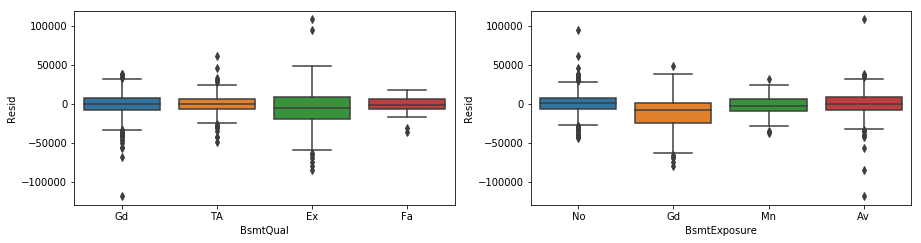

In [58]:
plt.figure(1, figsize=(15,10))
prows = 2
plt.subplots_adjust(hspace=0.8)
plt.subplot(prows, 2, 1)
sns.boxplot(data=dftre, x='BsmtQual', y='Resid')
plt.subplot(prows, 2, 2)
sns.boxplot(data=dftre, x='BsmtExposure', y='Resid')

# Submit

In [59]:
predict = clf.predict(dfts1)

In [60]:
output = pd.DataFrame({ 'Id' : dfts['Id'], 'SalePrice': np.exp(predict) })
output.to_csv('price-predictions.csv', index = False)
output.head()


,Id,SalePrice
0,1461,125041.103140
1,1462,173128.205283
2,1463,168710.703299
3,1464,195408.086360
4,1465,202773.131261
